# Sample Lya posterior as a function of nuisance parameters

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Setup Lya likelihood function

In [3]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [4]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Optimised
6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set

In [5]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu)

Note: redshifts have been re-sorted (earliest first)


In [6]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
prior_Gauss_rms=0.01
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,
                           min_kp_kms=min_kp_kms,ignore_emu_cov=ignore_emu_cov,
                           prior_Gauss_rms=prior_Gauss_rms,verbose=True)

likelihood setup with 4 free parameters
4 free parameters


In [7]:
for p in like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -0.8077668277205104 -2.995732273553991 -0.6931471805599453


In [8]:
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=2*len(like.free_params)+2)

use input likelihood
setup with 10 walkers
set 10 walkers with 4 dimensions
done setting up sampler


### Run burn-in chains

In [9]:
sampler.like.go_silent()

In [10]:
sampler.run_burn_in(nsteps=500)

start burn-in, will do 500 steps
0 [0.46437842 0.91177998 0.38844003 0.95878403]
20 [0.42669451 0.96839358 0.36674338 0.95307683]
40 [0.45388744 0.98617591 0.35442189 0.86486214]
60 [0.41952071 0.9873574  0.36465265 0.86735023]
80 [0.37633917 0.98859867 0.37536198 0.87460333]
100 [0.31233101 0.99618862 0.37954623 0.89493997]
120 [0.30448214 0.99465317 0.36291407 0.89416224]
140 [0.30482599 0.9848538  0.33979939 0.89321262]
160 [0.3180065  0.96903452 0.32441592 0.88393466]
180 [0.36336553 0.92430906 0.31977445 0.82267167]
200 [0.387782   0.90780176 0.31596239 0.7841264 ]
220 [0.38624531 0.89307887 0.33532855 0.77794612]
240 [0.39146583 0.88550535 0.33677563 0.77359386]
260 [0.39865891 0.87175239 0.33434263 0.77317163]
280 [0.40070076 0.86678456 0.33675078 0.77105057]
300 [0.40261082 0.86429029 0.3410328  0.77103602]
320 [0.41138367 0.86078603 0.33781937 0.76753895]
340 [0.41066966 0.85991793 0.33737695 0.76770089]
360 [0.41469606 0.85643157 0.33963099 0.76693267]
380 [0.41404716 0.85565

### Run main chains

In [11]:
sampler.run_chains(nsteps=2000)

0 [0.41908245 0.85721649 0.34521184 0.76547828]
20 [0.41602608 0.86038496 0.3492396  0.76385275]
40 [0.4161796  0.86308851 0.35073122 0.7648065 ]
60 [0.41221336 0.85938904 0.35069009 0.76692597]
80 [0.41571121 0.86120265 0.34935795 0.76598779]
100 [0.41672753 0.86253686 0.34626735 0.7647977 ]
120 [0.42041135 0.86051507 0.34660137 0.76302699]
140 [0.415554   0.86089232 0.34688106 0.76529184]
160 [0.4182382  0.8646783  0.3471774  0.76521539]
180 [0.41248645 0.86263075 0.34324506 0.76833262]
200 [0.40823347 0.86192412 0.34343531 0.76974684]
220 [0.40937982 0.86056285 0.34237026 0.76898756]
240 [0.41506101 0.85643597 0.34922603 0.76658945]
260 [0.4117002  0.85765516 0.3540933  0.76624794]
280 [0.40915261 0.85791307 0.34764468 0.76862643]
300 [0.41044818 0.85649509 0.34662203 0.76861965]
320 [0.41186324 0.85980349 0.34491815 0.76871091]
340 [0.41153412 0.86045136 0.34365898 0.77030685]
360 [0.41149231 0.86276669 0.34769695 0.76923709]
380 [0.40970985 0.86261766 0.35038406 0.76691682]
400 [0

In [12]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.600


### Plot results in cube units (0 < x < 1)

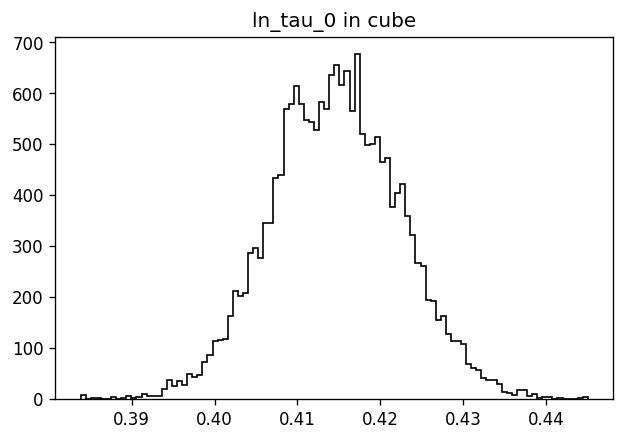

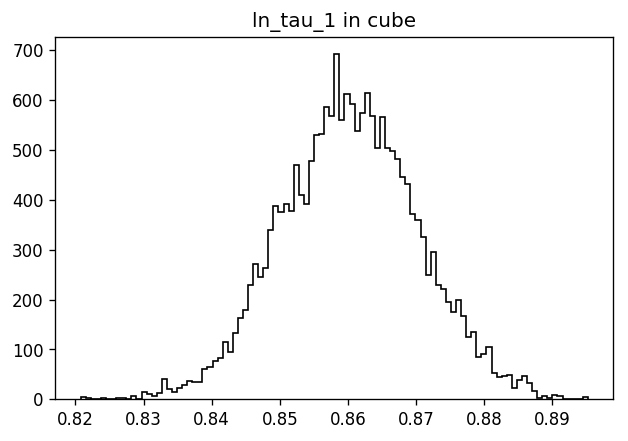

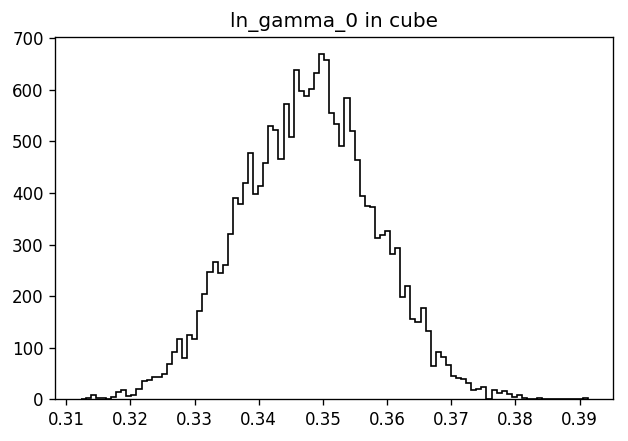

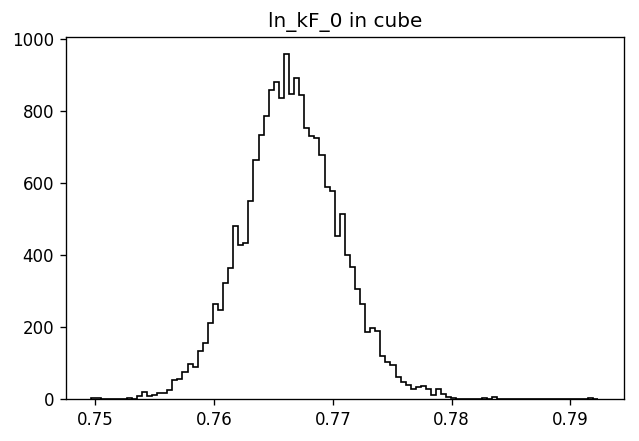

In [13]:
sampler.plot_histograms(cube=True)

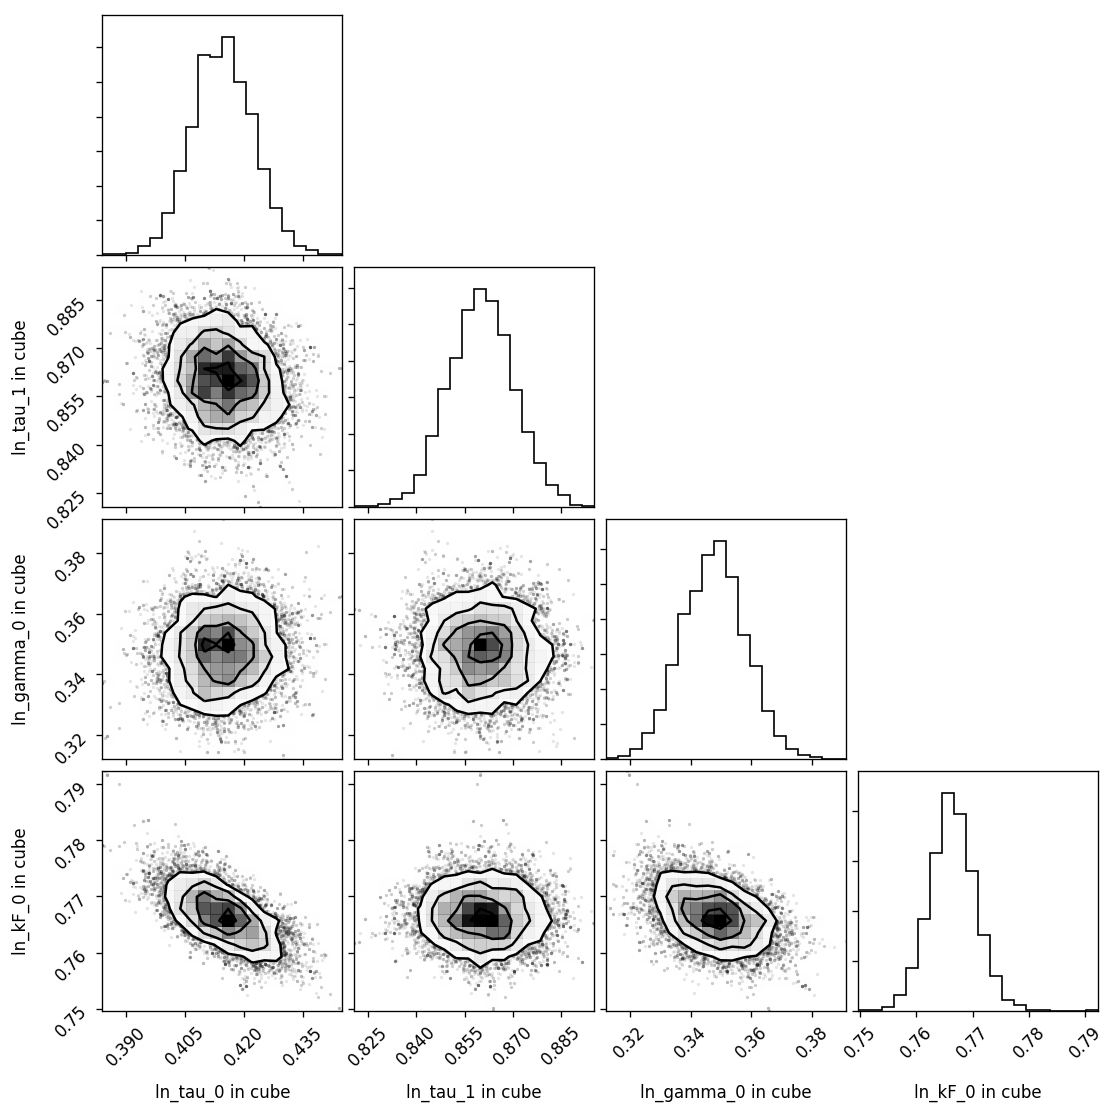

In [14]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

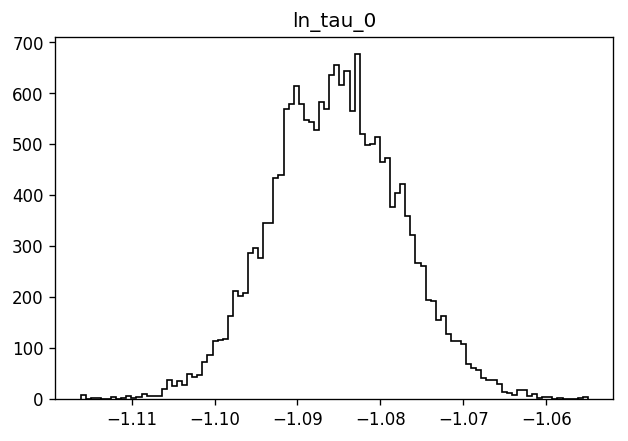

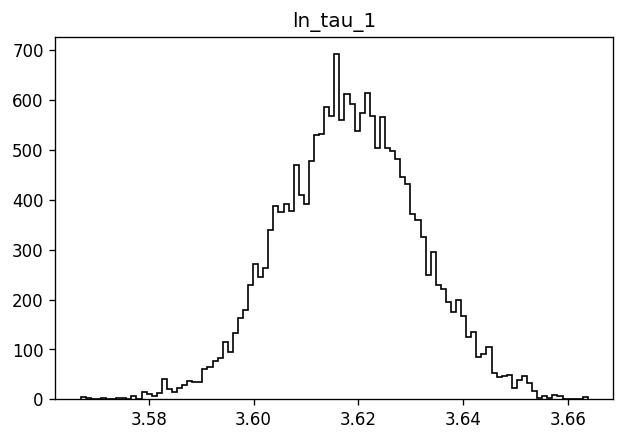

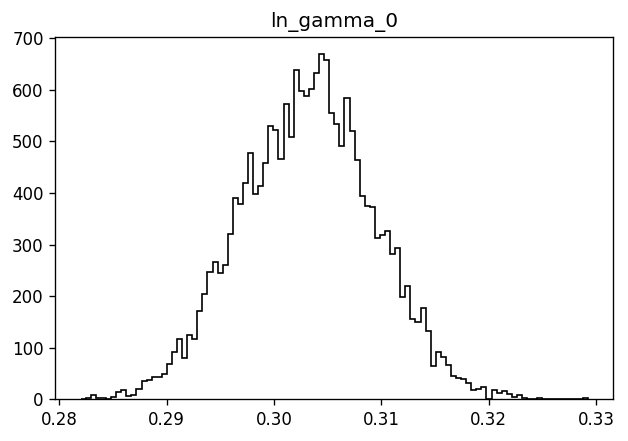

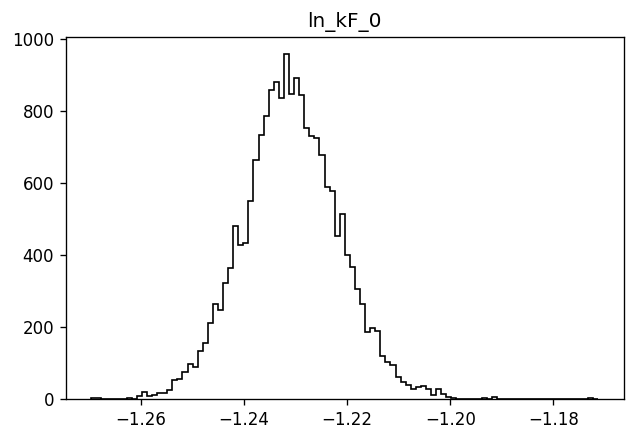

In [15]:
sampler.plot_histograms(cube=False)

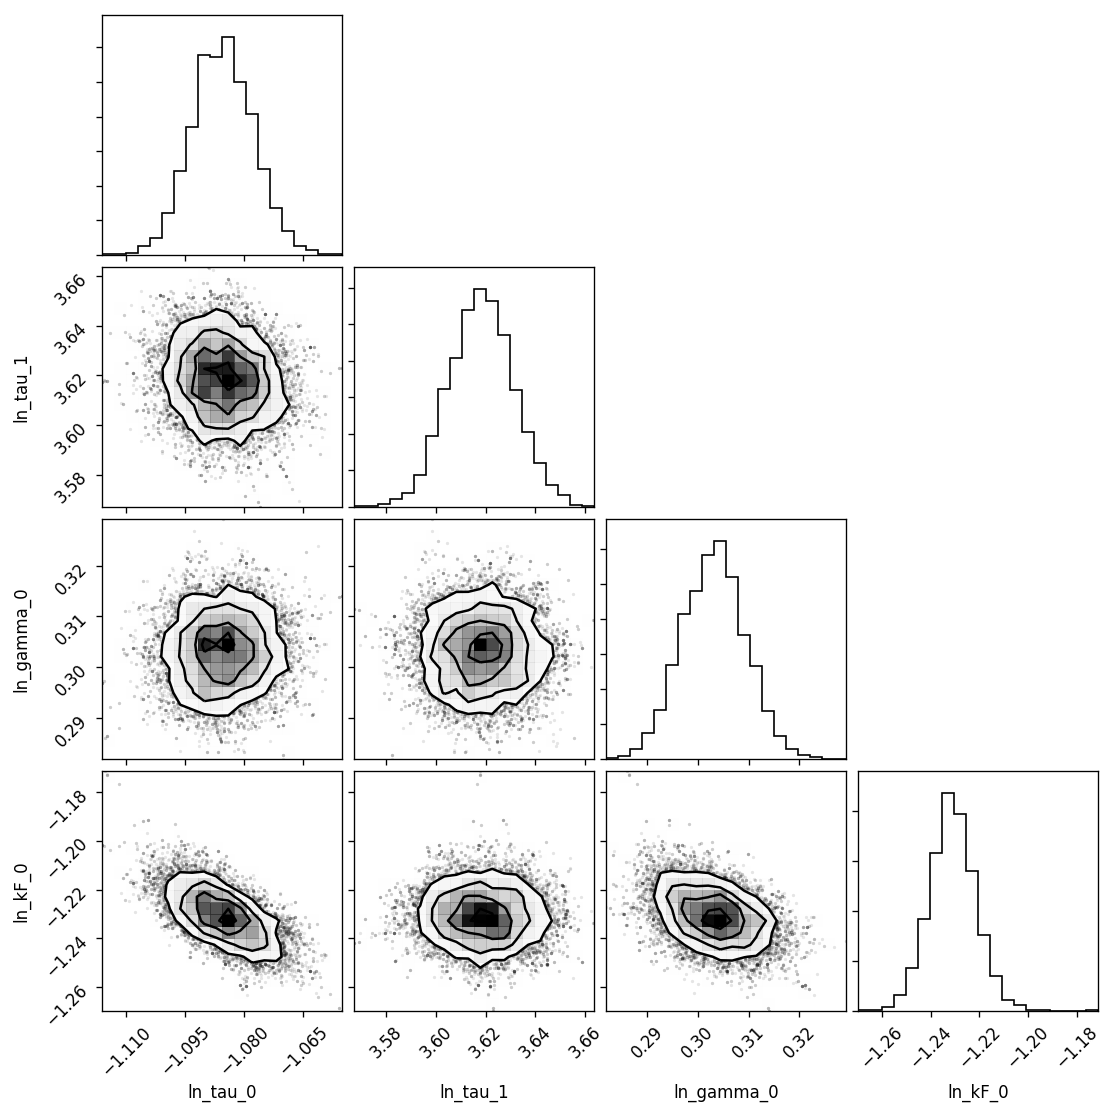

In [16]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [17]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

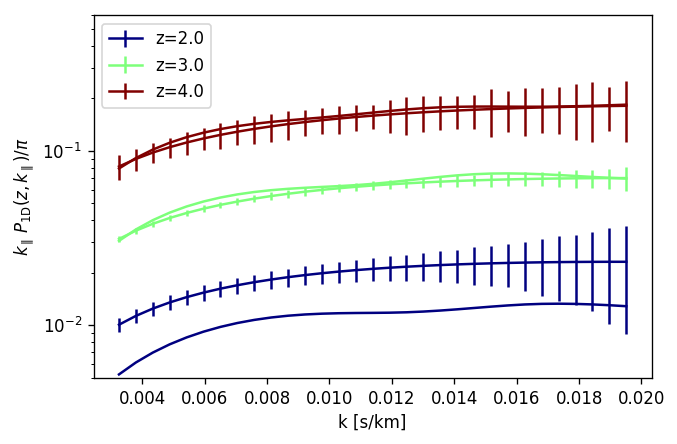

In [18]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

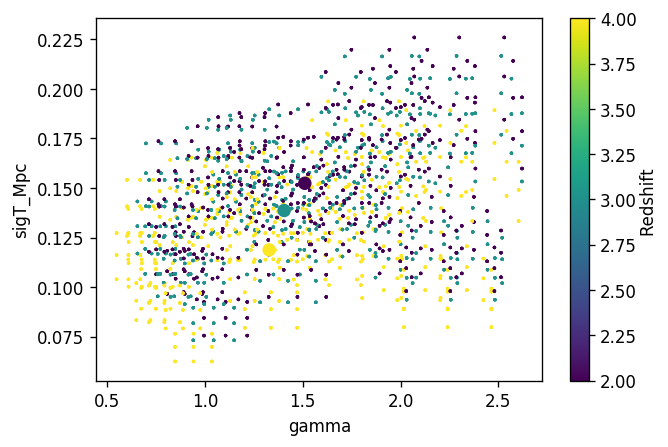

In [19]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

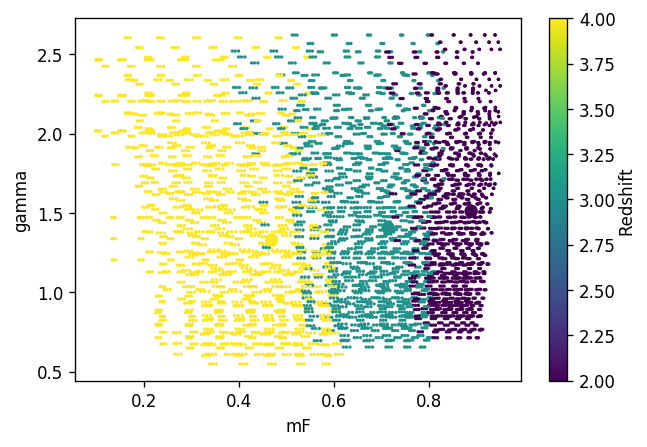

In [20]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

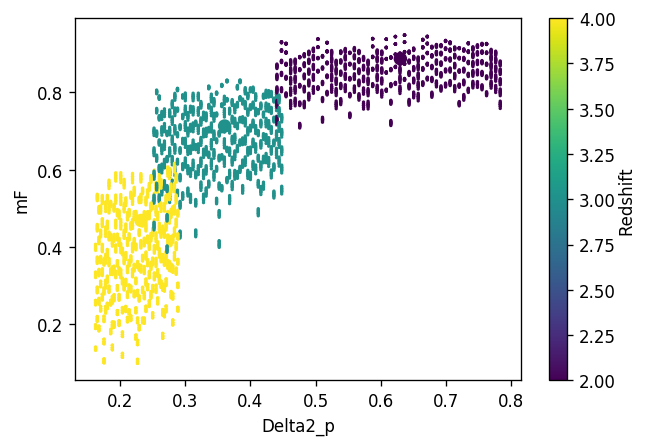

In [21]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

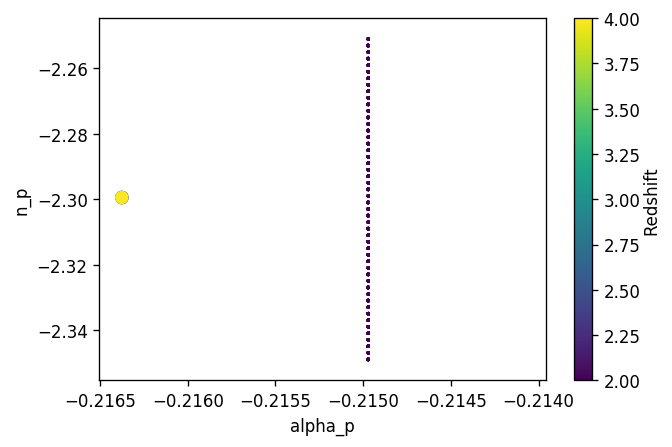

In [22]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

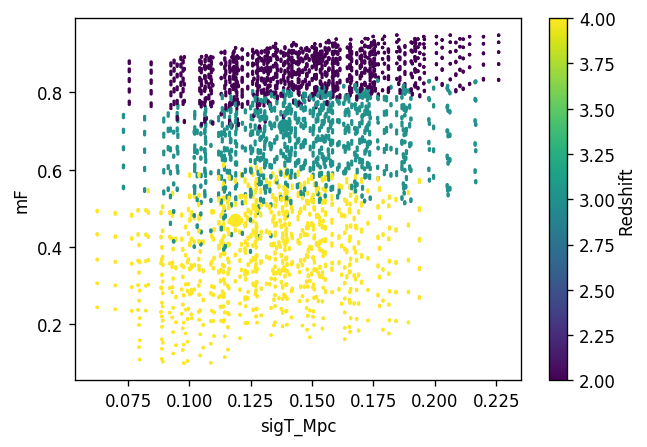

In [23]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

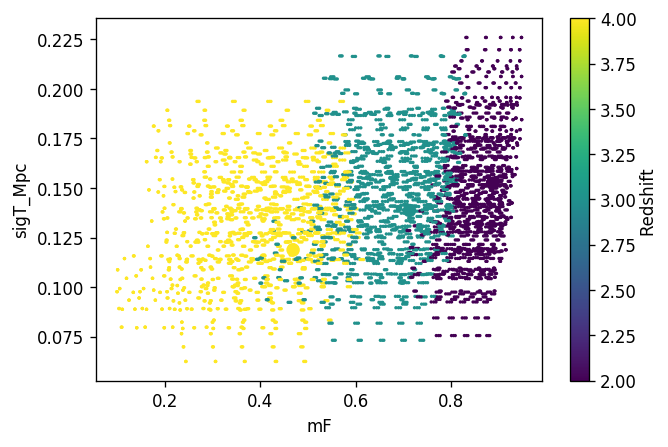

In [24]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

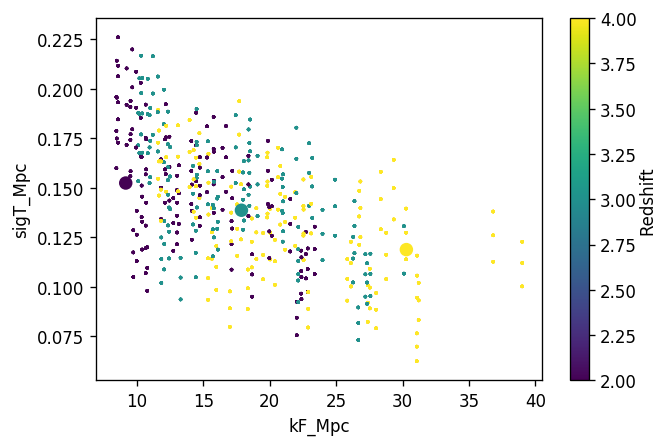

In [25]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

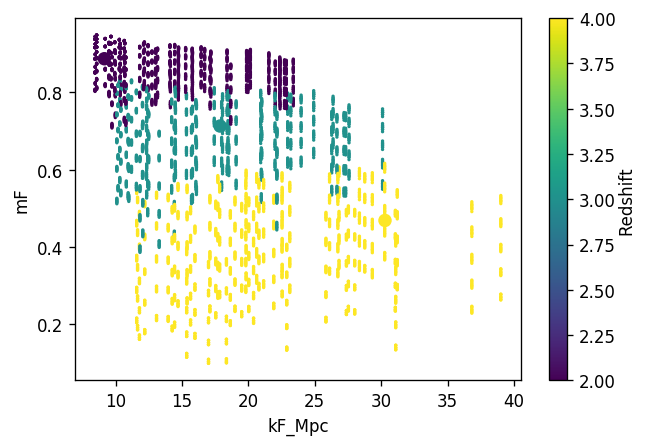

In [26]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [27]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [28]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


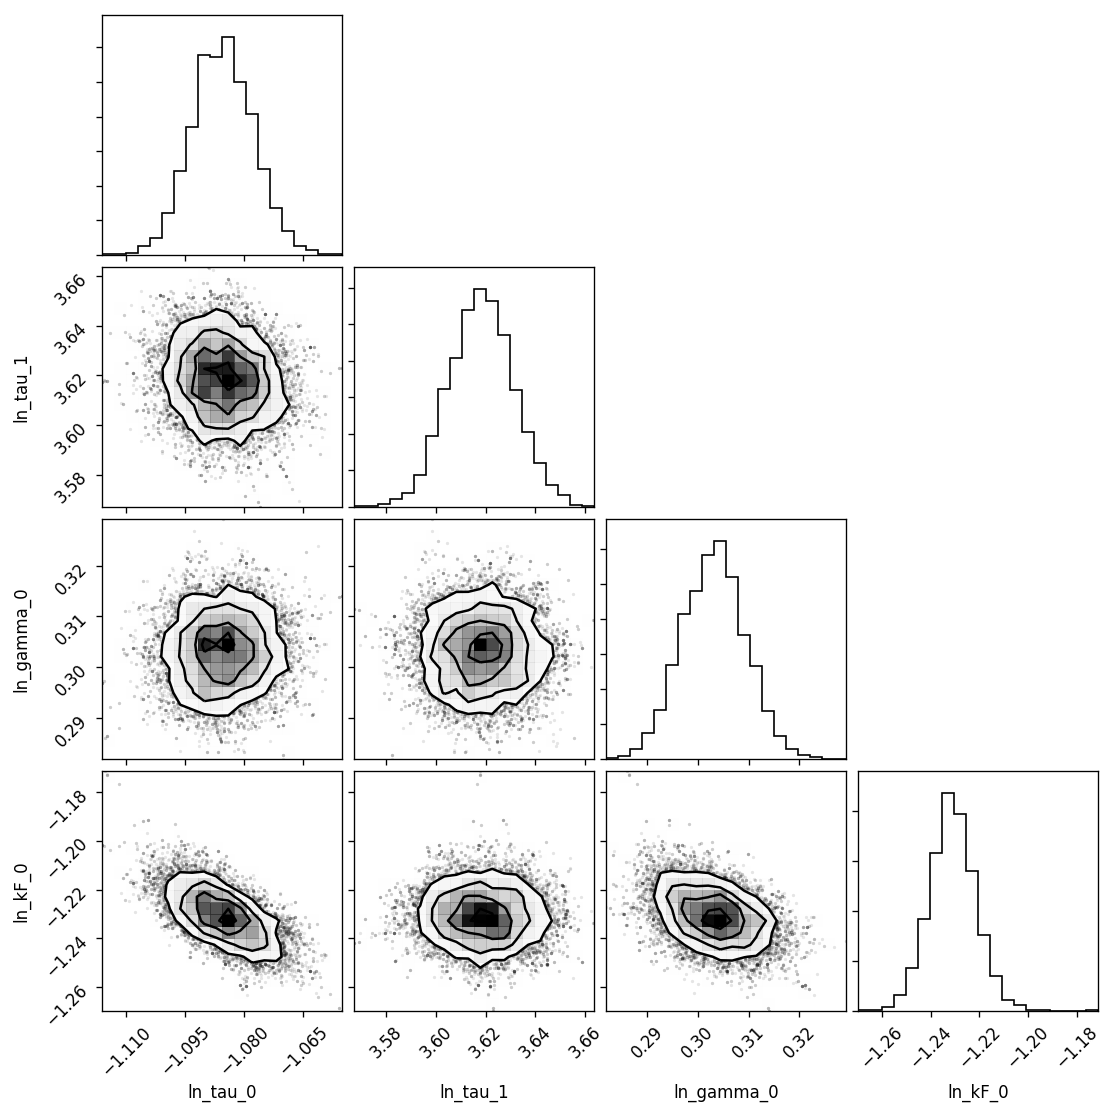

In [29]:
new_sampler.plot_corner(cube=False)

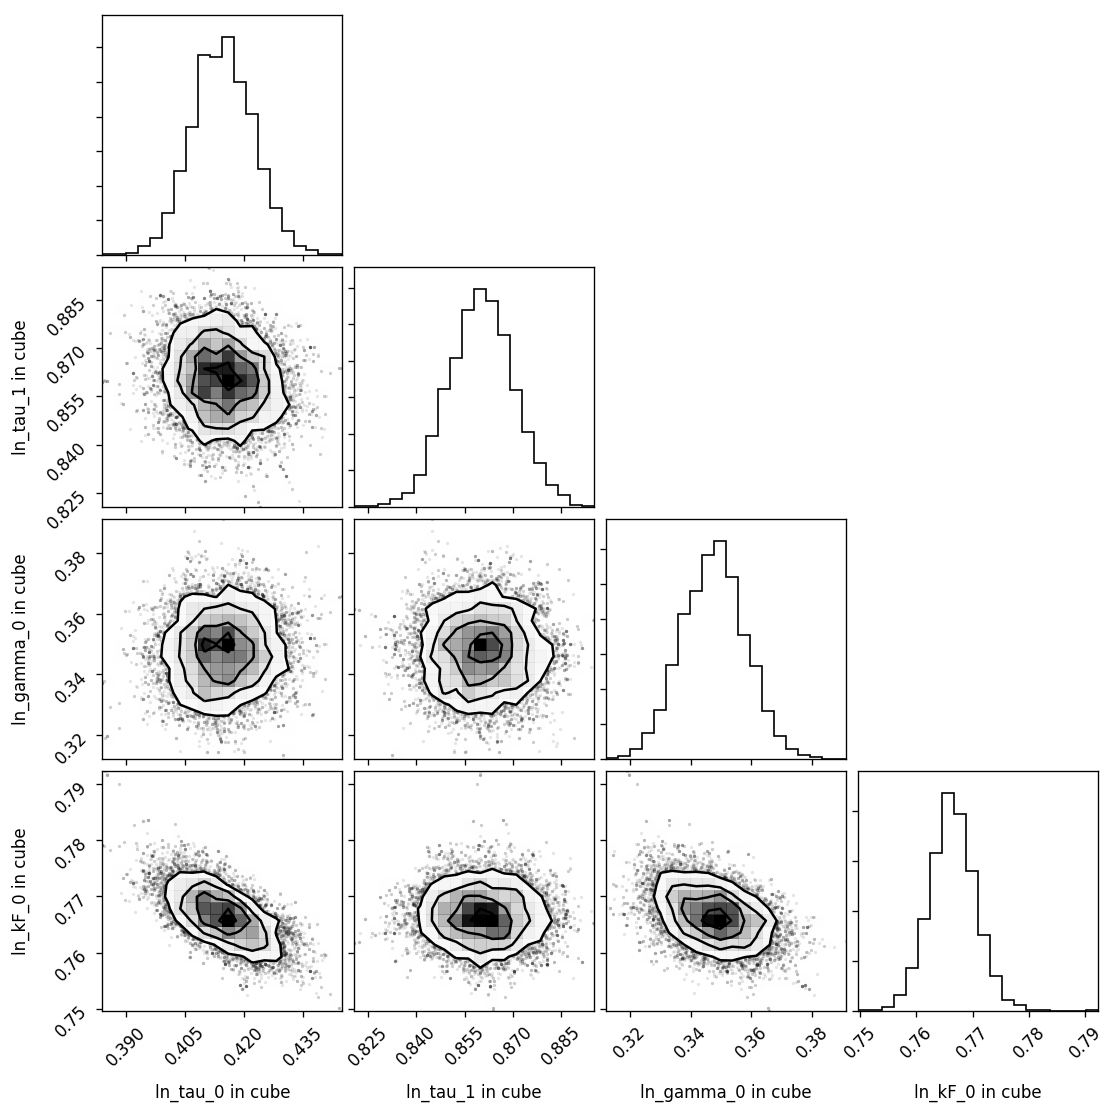

In [30]:
new_sampler.plot_corner(cube=True)

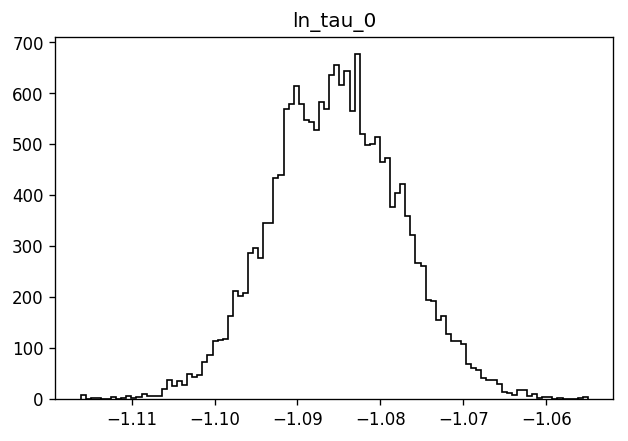

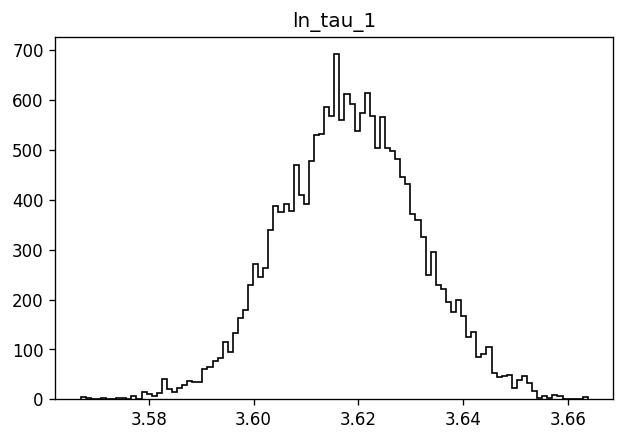

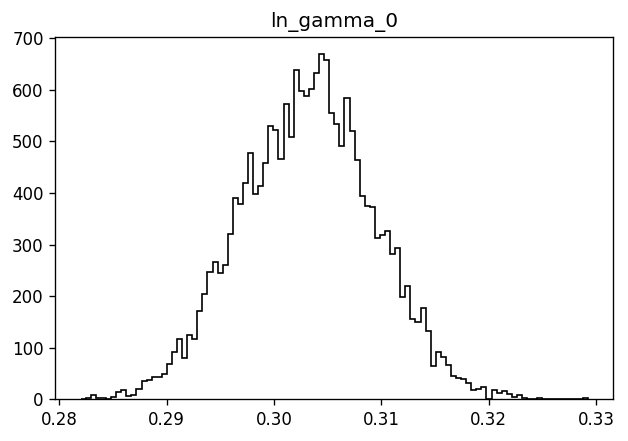

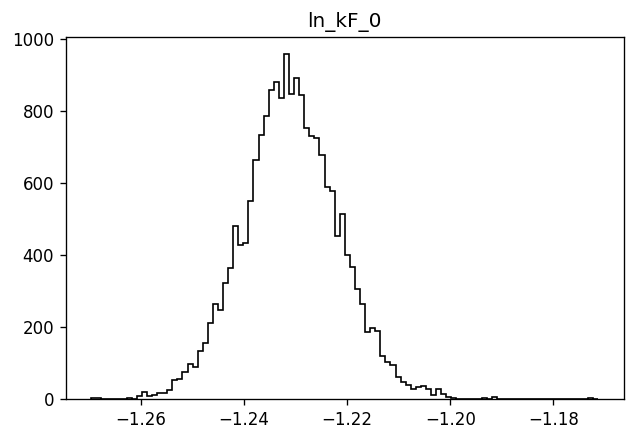

In [31]:
new_sampler.plot_histograms(cube=False)